In [1]:
import pandas as pd
import os
import glob
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
os.getcwd()

'C:\\Users\\user\\Documents\\GitHub\\DataScience\\module-5'

In [3]:
folders = glob.glob("data/*")
folders

['data\\idle', 'data\\running', 'data\\stairs', 'data\\walking']

In [4]:
data = pd.DataFrame()
for folder in folders:
    type_of_load = folder.split("\\")[1]
    print(type_of_load)
    path_csv = folder + "/*.csv"
    files = glob.glob(path_csv)
    for file in files:        
        data_csv = pd.read_csv(file)
        data_csv["type_of_load"]=type_of_load
        data = pd.concat([data, data_csv], ignore_index=True)

idle
running
stairs
walking


In [5]:
data.tail(15)

,accelerometer_X,accelerometer_Y,accelerometer_Z,type_of_load
193845,-1.647211,-5.305551,9.169792,walking
193846,3.399767,-15.586253,-0.804452,walking
193847,4.572925,0.181959,32.599450,walking
193848,5.607220,-13.005303,-0.378284,walking
193849,3.672706,-10.874464,-7.058106,walking
193850,1.939303,-9.097966,-2.782062,walking
193851,-0.344765,-4.161122,1.230620,walking
193852,-0.387861,-9.174581,3.031059,walking
193853,-7.359776,-15.322891,0.852336,walking
193854,11.113884,-19.603724,-3.921702,walking


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']], data['type_of_load'], test_size=0.33, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled

array([[-0.12104913,  0.2072617 ,  0.52037625],
       [ 0.28070379, -0.87788865, -0.18383283],
       [ 0.52894587, -0.85521721, -1.01614015],
       ...,
       [-0.30994136, -0.37220237, -0.04246003],
       [-0.44975592, -0.37104961,  0.11882443],
       [ 1.55273061,  1.27934711,  1.17414255]])

In [10]:
X_test_scaled

array([[-0.46630543, -0.87750434, -0.6338363 ],
       [-0.34304038,  0.81093421,  0.49648233],
       [ 0.00449865, -0.470573  , -0.18980624],
       ...,
       [-0.26371704, -0.12973435,  1.12635457],
       [ 0.14716656, -1.05810658, -0.41547171],
       [ 0.22249518, -1.42853324,  0.07900113]])

In [11]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

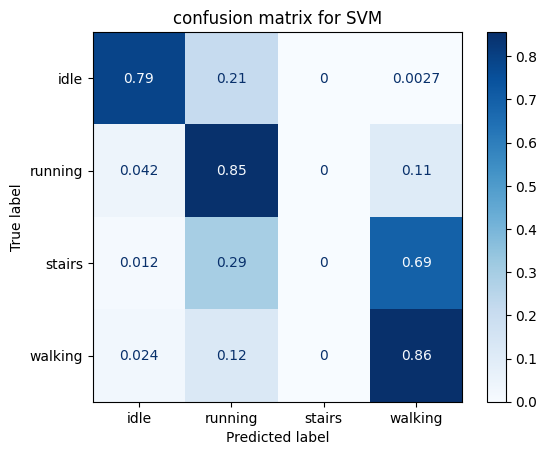

In [12]:
matrix = ConfusionMatrixDisplay.from_estimator(svm, X_test_scaled, y_test, cmap=plt.cm.Blues, normalize="true")
plt.title("confusion matrix for SVM")
plt.show(matrix)
plt.show()

In [13]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [14]:
svm_predict = svm.predict(X_test_scaled)
rfc_predict = rfc.predict(X_test_scaled)

In [15]:
svm_accuracy = accuracy_score(y_test, svm_predict)
rfc_accuracy = accuracy_score(y_test, rfc_predict)

In [16]:
svm_accuracy

0.8204739425391565

In [17]:
rfc_accuracy

0.999562322193391

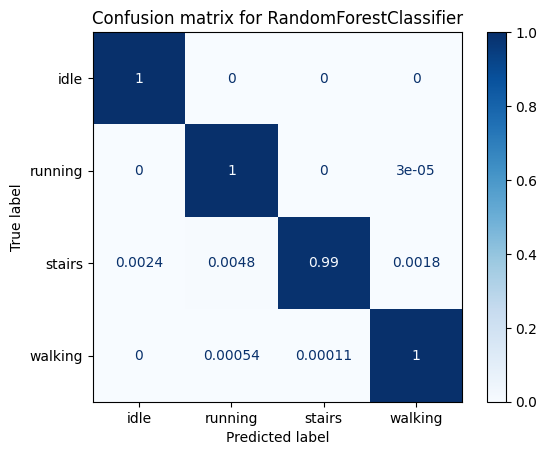

In [19]:
matrix_rfc = ConfusionMatrixDisplay.from_estimator(rfc, X_test_scaled, y_test, cmap=plt.cm.Blues, normalize="true")
plt.title("Confusion matrix for RandomForestClassifier")
plt.show(matrix_rfc)
plt.show()